# YOLOv8 PPE Detection Model Training
이 notebook은 PPE(개인 보호 장비) 감지 모델을 학습하기 위한 파일입니다.
Google Colab에서 YOLOv8을 이용해 Hardhat / Mask / Vest / NO-Hardhat 등
10개 클래스의 객체 감지를 위한 모델을 학습하고 평가합니다.

In [ ]:
!pip install ultralytics

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from pathlib import Path
from ultralytics import YOLO

base_dir = Path("/content/drive/MyDrive/Project/Object_Detection")
data_cfg = base_dir / "custom_colab.yaml"

In [ ]:
model = YOLO("yolov8n.pt")

model.train(
    data=str(data_cfg),
    epochs=30,
    imgsz=640,
    batch=16,
    device=0,
    project=str(base_dir / "outputs"),
    name="ppe_train",
    exist_ok=True,
    cache=True,
)

In [7]:
from google.colab import drive
from pathlib import Path
from ultralytics import YOLO
from IPython.display import Image, display
import matplotlib.pyplot as plt

base_dir = Path("/content/drive/MyDrive/Project/Object_Detection")

run_name = "ppe_train"

run_dir = base_dir / "outputs" / run_name
data_cfg = base_dir / "custom_colab.yaml"

model_path = run_dir / "weights" / "best.pt"
print("Using model:", model_path)

model = YOLO(str(model_path))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using model: /content/drive/MyDrive/Project/Object_Detection/outputs/ppe_train/weights/best.pt


results.png 경로: /content/drive/MyDrive/Project/Object_Detection/outputs/ppe_train/results.png


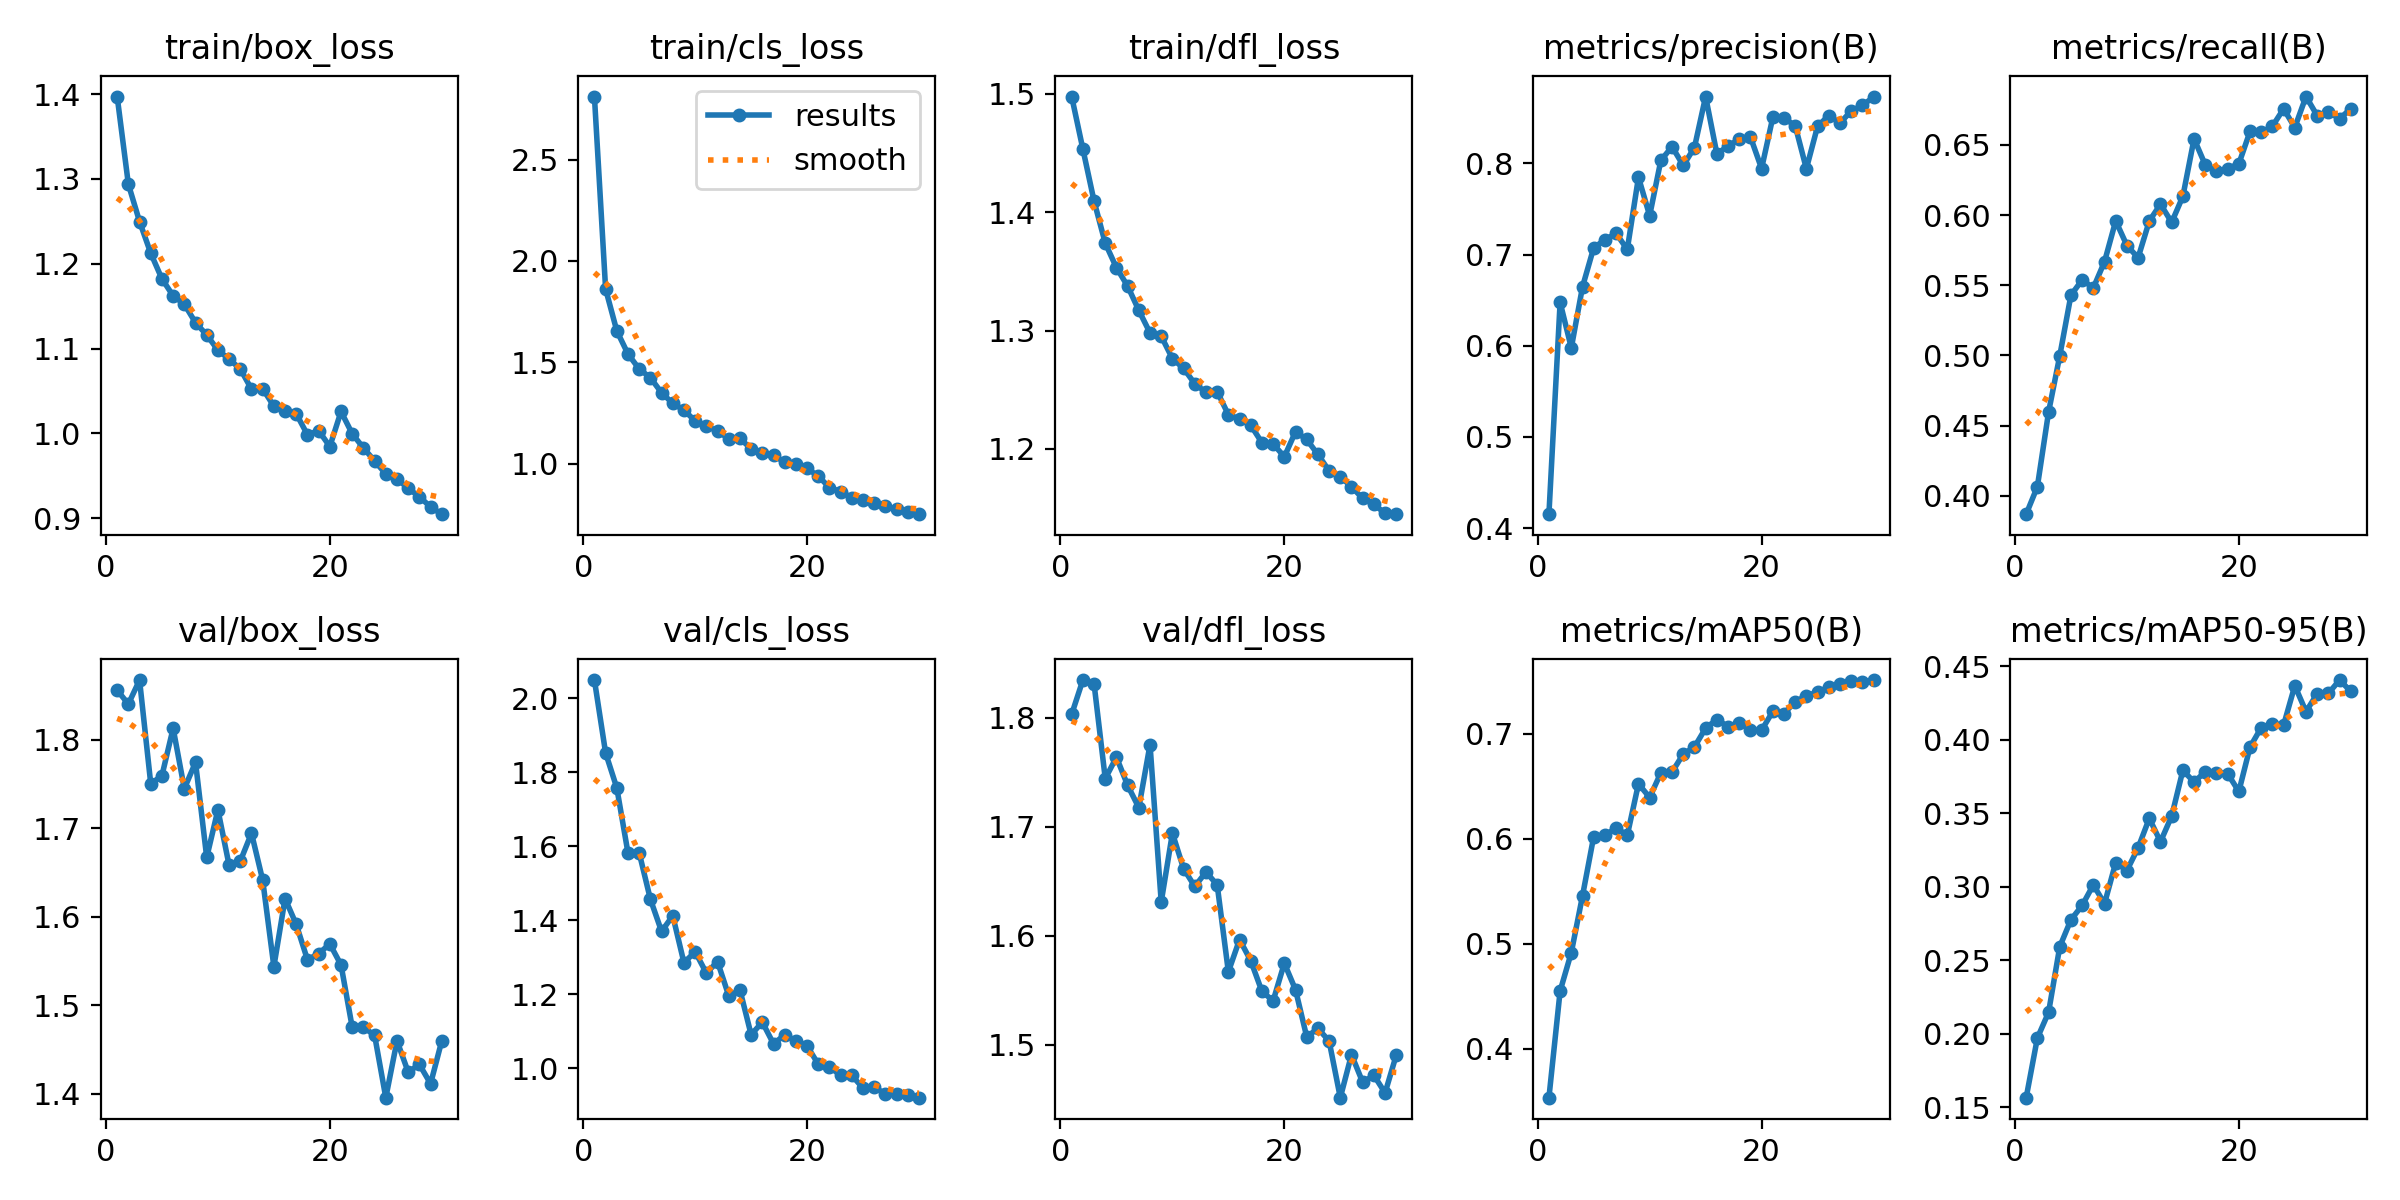

In [8]:
results_png = run_dir / "results.png"
print("results.png 경로:", results_png)

if results_png.exists():
    display(Image(filename=str(results_png)))
else:
    print("⚠ results.png 파일을 찾을 수 없습니다.")

In [9]:
metrics = model.val(
    data=str(data_cfg),
    split="val",
    project=str(base_dir / "outputs"),
    name="ppe_val",
    exist_ok=True,
    plots=True,
)

print("mAP50-95:", metrics.box.map)
print("mAP50:", metrics.box.map50)


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 36.2±24.5 MB/s, size: 58.2 KB)
val: Scanning /content/drive/MyDrive/Project/Object_Detection/css-data/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 114/114 114.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 1.9it/s 4.2s
                   all        114        697      0.866       0.67       0.75      0.441
               Hardhat         42         79      0.945      0.734      0.827      0.545
                  Mask         19         21      0.884       0.81      0.855      0.554
            NO-Hardhat         37         69      0.889      0.522      0.658      0.333
               NO-Mask         44         74      0.863      0.512      0.603      0.266
        NO-S

val 결과 폴더: /content/drive/MyDrive/Project/Object_Detection/outputs/ppe_val
Confusion Matrix 경로: /content/drive/MyDrive/Project/Object_Detection/outputs/ppe_val/confusion_matrix.png


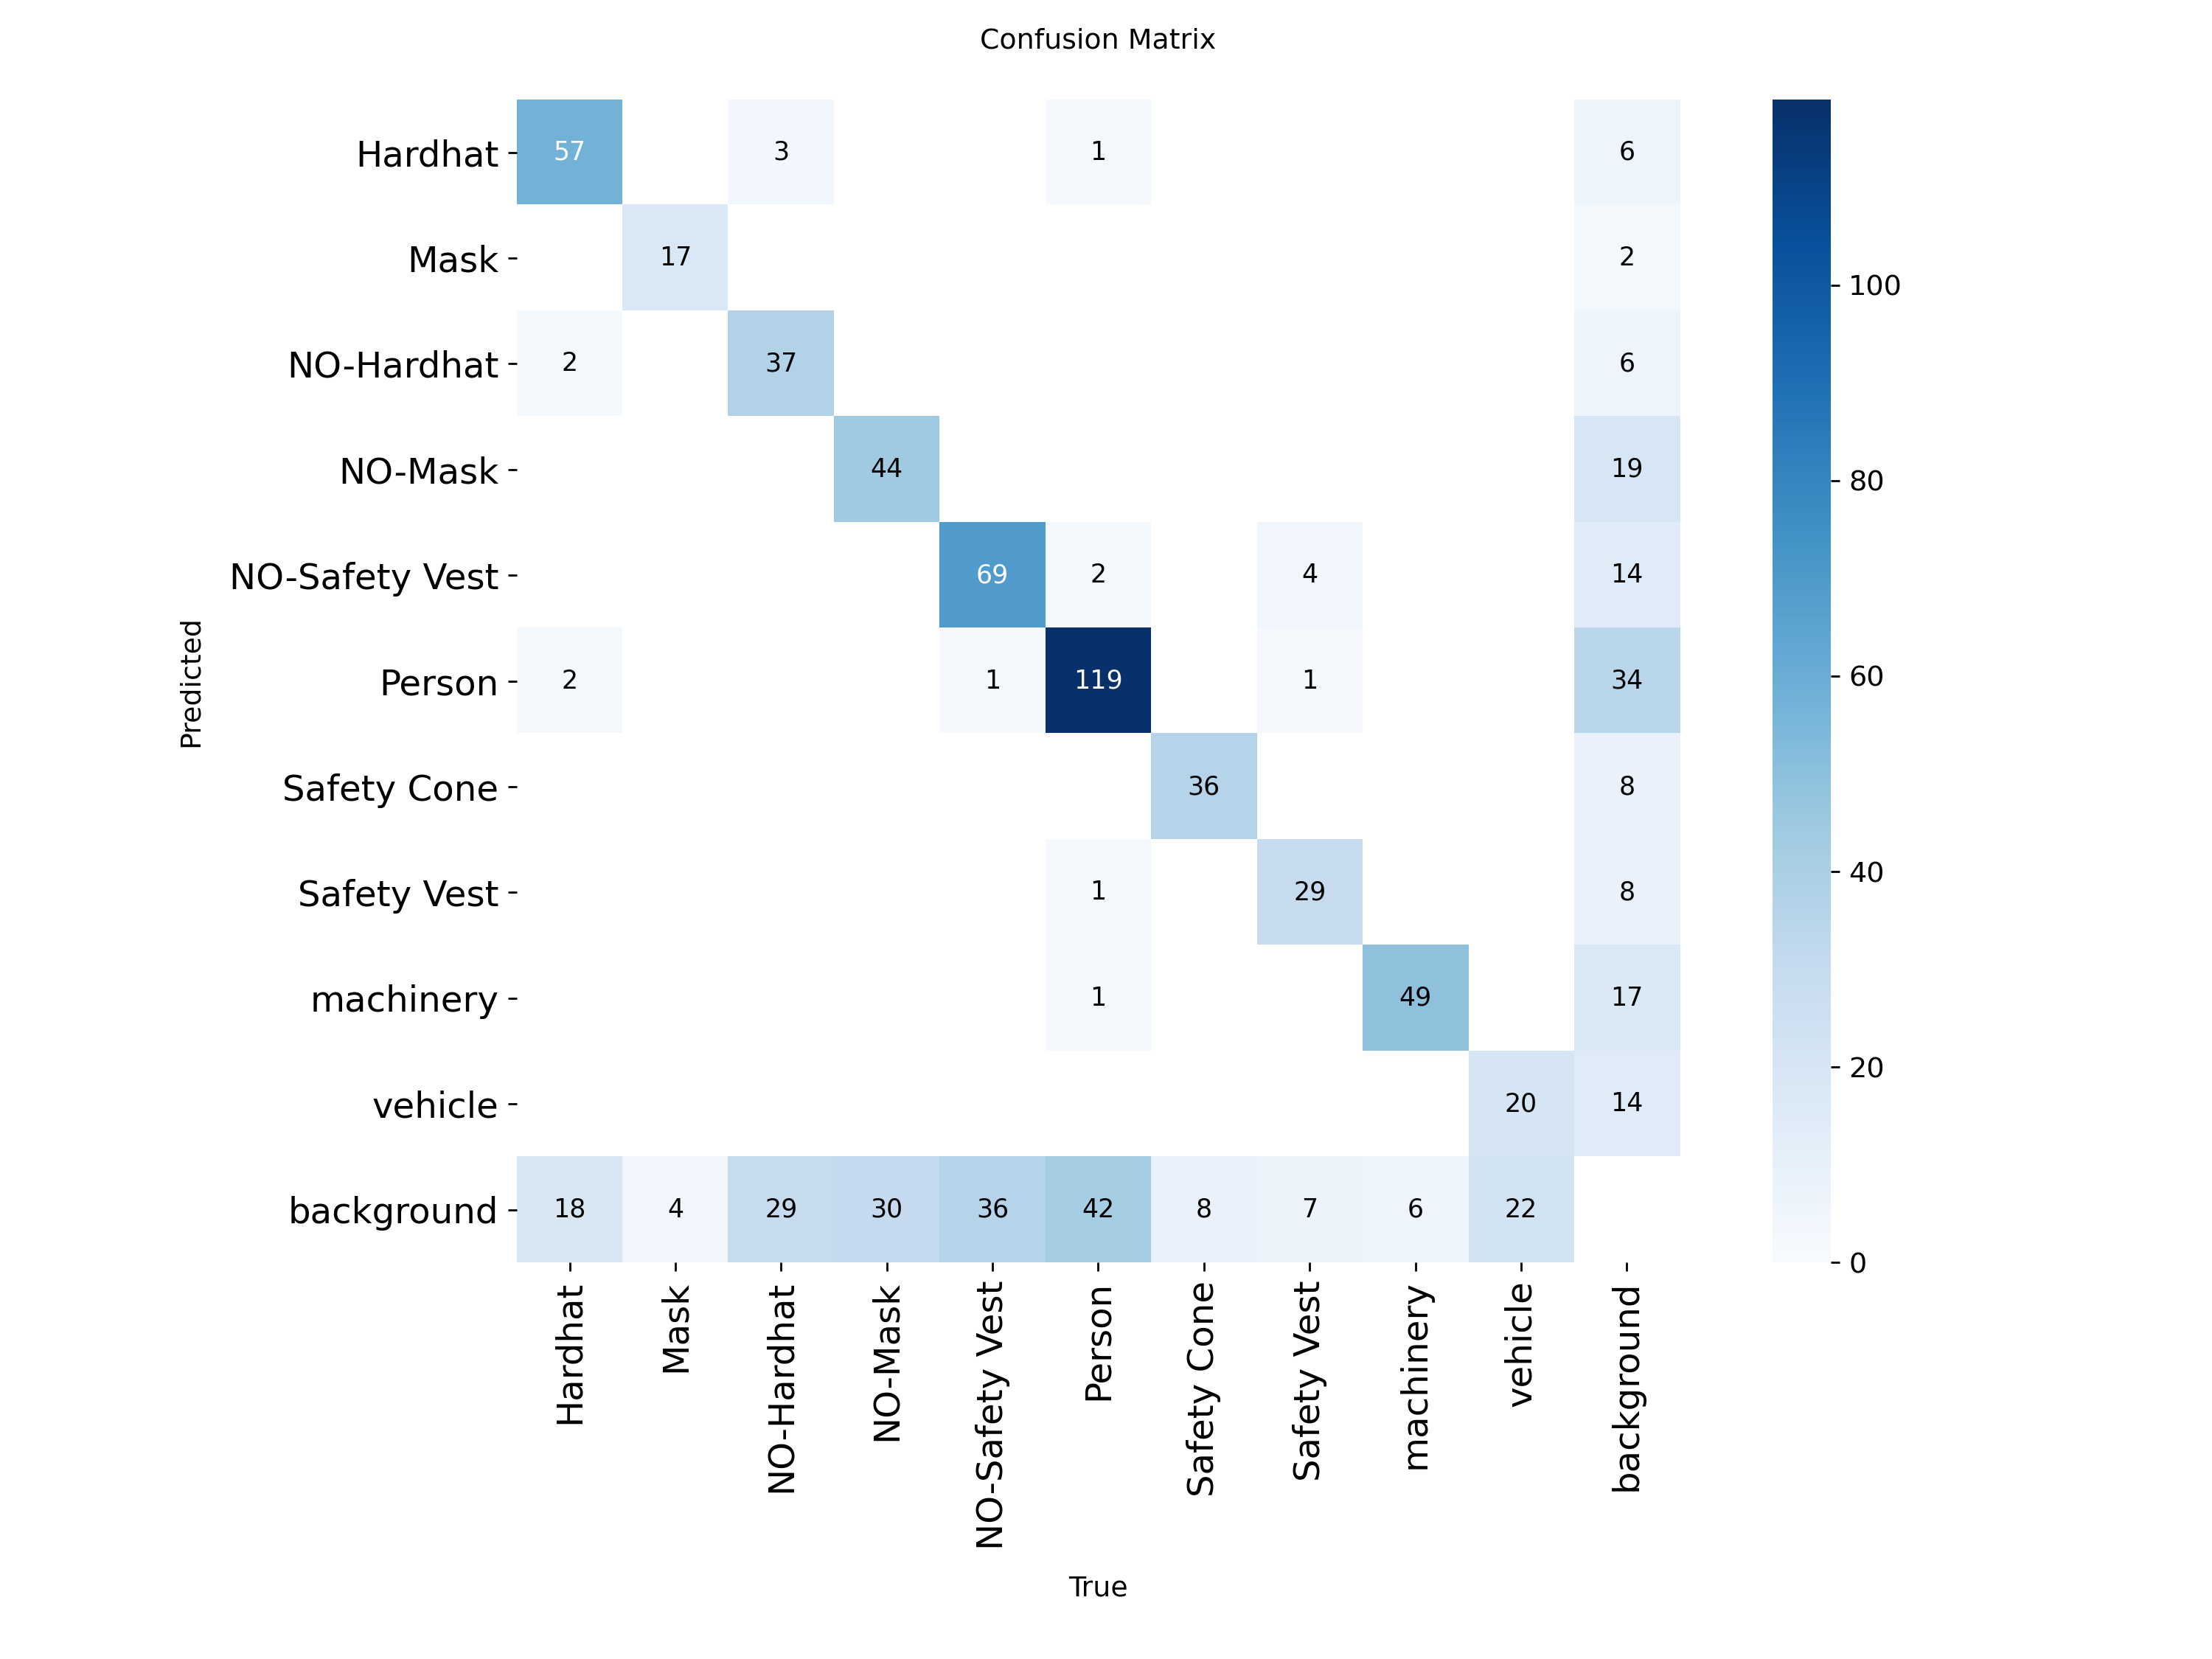

Precision-Recall Curve 경로: /content/drive/MyDrive/Project/Object_Detection/outputs/ppe_val/BoxPR_curve.png


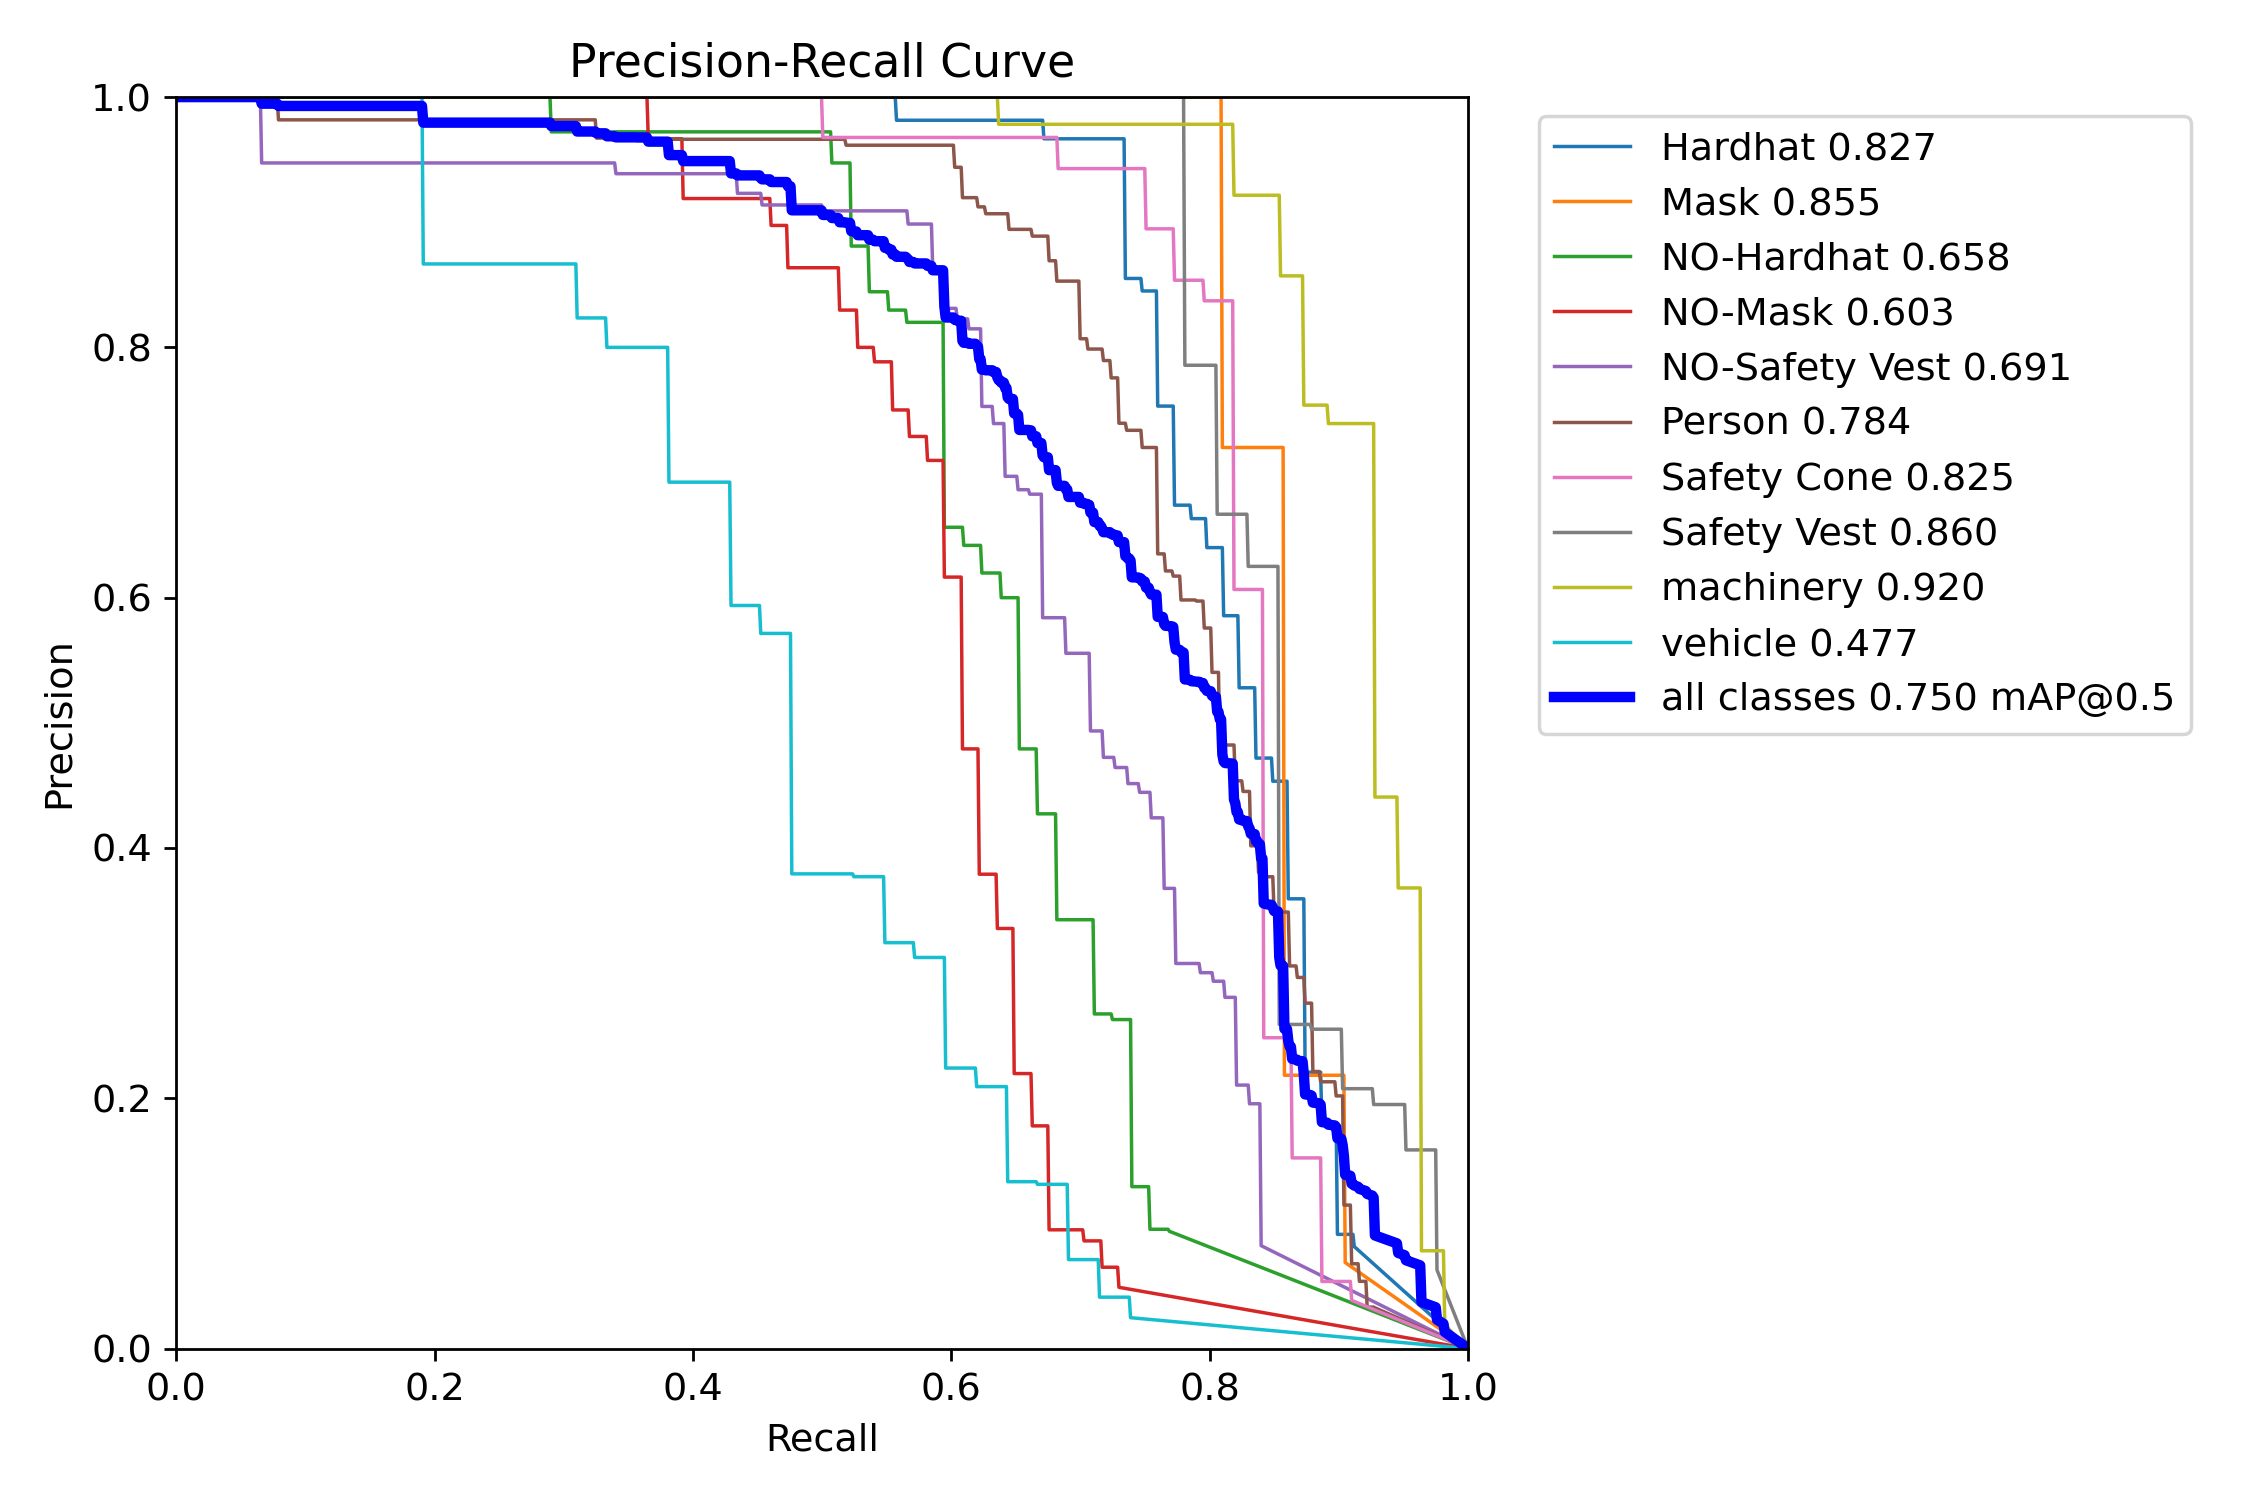

F1 Curve 경로: /content/drive/MyDrive/Project/Object_Detection/outputs/ppe_val/BoxF1_curve.png


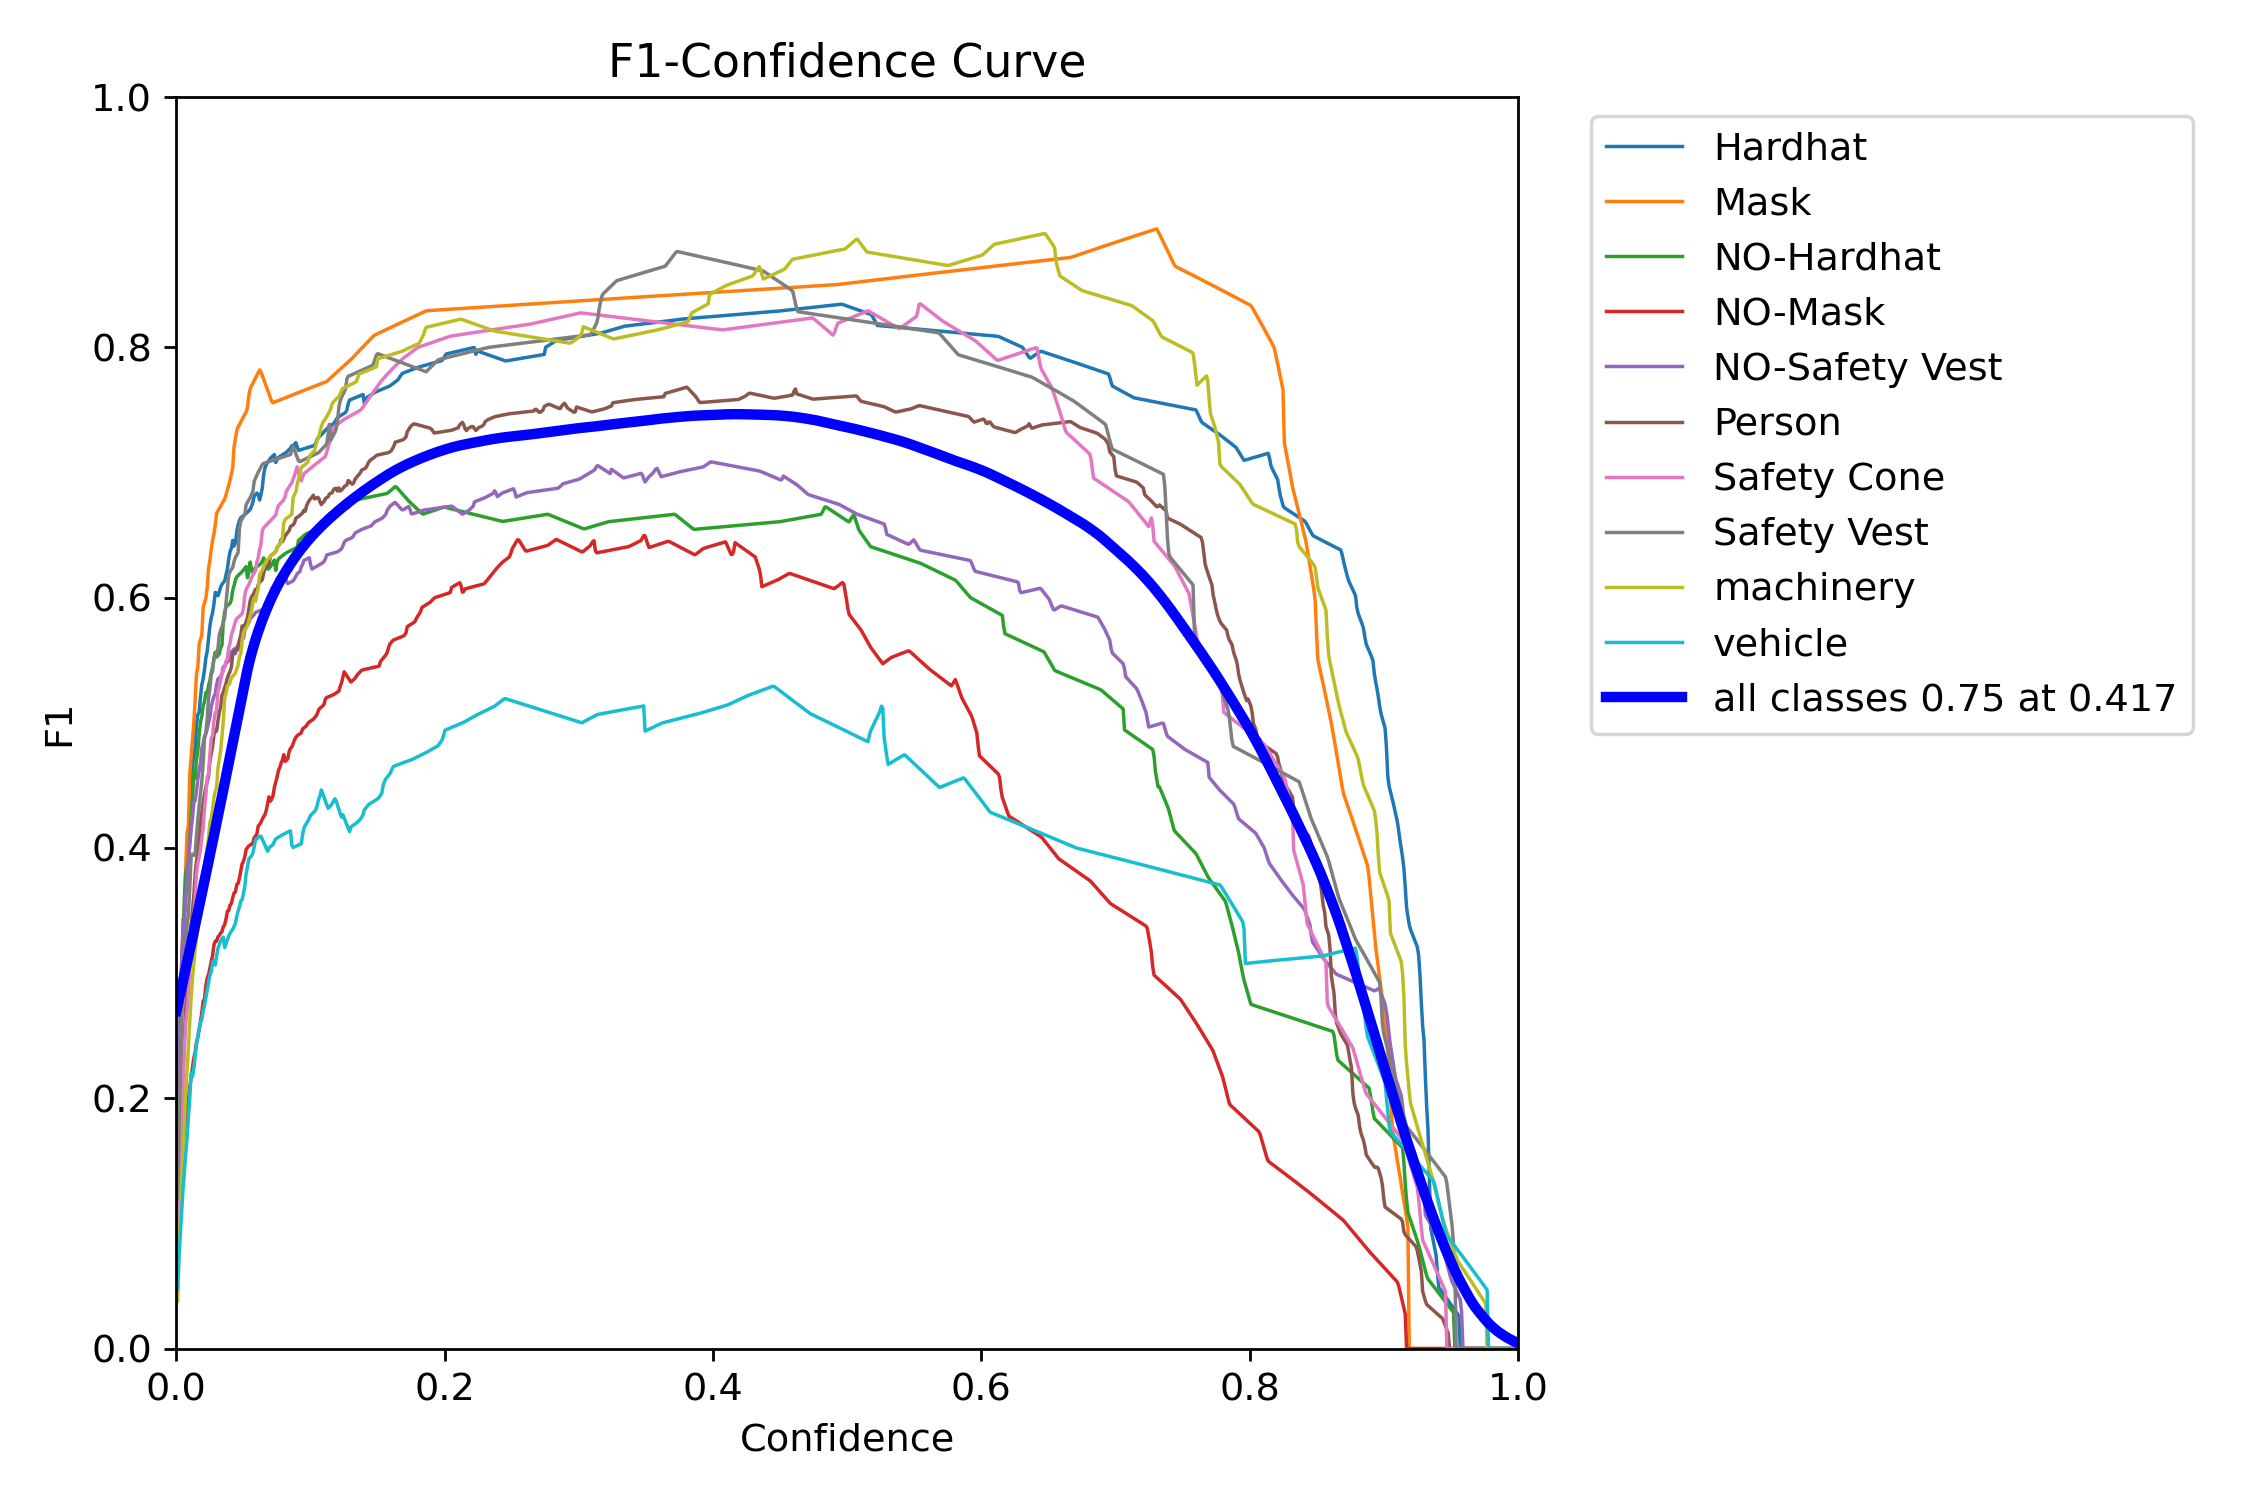

In [16]:
val_dir = base_dir / "outputs" / "ppe_val"
print("val 결과 폴더:", val_dir)

conf_png = val_dir / "confusion_matrix.png"
pr_png   = val_dir / "BoxPR_curve.png"
f1_png   = val_dir / "BoxF1_curve.png"

for img_path, desc in [
    (conf_png, "Confusion Matrix"),
    (pr_png, "Precision-Recall Curve"),
    (f1_png, "F1 Curve"),
]:
    print(f"{desc} 경로:", img_path)
    if img_path.exists():
        display(Image(filename=str(img_path)))
    else:
        print(f"⚠ {desc} 이미지를 찾을 수 없습니다.")



image 1/1 /content/test_image.png: 416x640 4 Hardhats, 4 NO-Masks, 4 Persons, 4 Safety Vests, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /content/drive/MyDrive/Project/Object_Detection/outputs/ppe_example


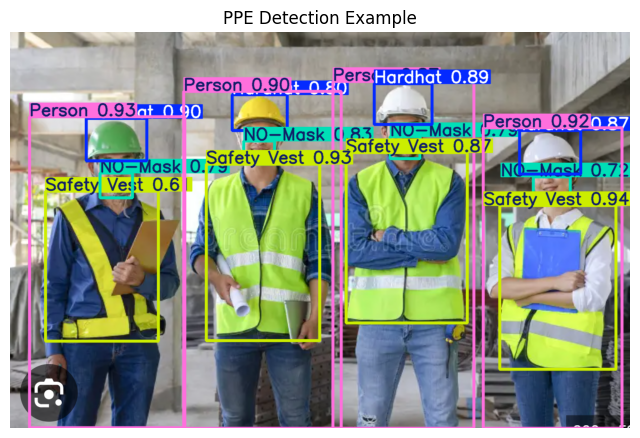

In [14]:
test_img = "/content/test_image.png"

results = model.predict(
    source=test_img,
    conf=0.5,
    save=True,
    project=str(base_dir / "outputs"),
    name="ppe_example",
    exist_ok=True,
)

res_img = results[0].plot()

plt.figure(figsize=(8, 6))
plt.imshow(res_img[..., ::-1])  # BGR → RGB
plt.axis("off")
plt.title("PPE Detection Example")
plt.show()
